In [61]:
import sys
import os
sys.path.append('../src')
import importlib
import visualization
visualization.os = os 

importlib.reload(visualization)

from visualization import *
import plotly.offline as pyo

# Enable Plotly in Jupyter
pyo.init_notebook_mode(connected=True)

print("🎨 REGIONAL MUSIC DNA - INTERACTIVE VISUALIZATIONS")
print("=" * 60)

# Load data
df = load_analysis_data()

🎨 REGIONAL MUSIC DNA - INTERACTIVE VISUALIZATIONS
📊 Loaded: 1,562 tracks from 8 cities


In [42]:
#musical dna fingerprints
print('Creating Musical DNA Fingerprints')

try:
    dna_fig, city_profiles = create_musical_dna_fingerprint(df)
    dna_fig.show()
except:
    # Fallback to cleaner bar chart version
    print("Using alternative clean visualization...")
    cards_fig, city_data = create_city_profile_cards(df)
    cards_fig.show()

print('\nCity Profile Summary:')
for city, profile in city_profiles.items():
    print(f'\n{city}:')
    for metric, value in profile.items():
        print(f'  {metric}: {value:.1f}')

Creating Musical DNA Fingerprints

CREATING MUSICAL DNA FINGERPRINTS



City Profile Summary:

Nashville:
  Popularity: 55.2
  Diversity: 14.7
  Modernity: 75.3
  Appeal: 74.6

Los Angeles:
  Popularity: 37.3
  Diversity: 100.0
  Modernity: 12.5
  Appeal: 64.0

Chicago:
  Popularity: 26.8
  Diversity: 44.0
  Modernity: 62.8
  Appeal: 56.5

Miami:
  Popularity: 67.2
  Diversity: 44.0
  Modernity: 72.9
  Appeal: 72.7

New York:
  Popularity: 72.5
  Diversity: 23.9
  Modernity: 61.6
  Appeal: 78.1

Seattle:
  Popularity: 36.7
  Diversity: 33.0
  Modernity: 1.9
  Appeal: 67.4

Austin:
  Popularity: 69.5
  Diversity: 20.2
  Modernity: 80.8
  Appeal: 74.4

Atlanta:
  Popularity: 47.5
  Diversity: 17.4
  Modernity: 51.2
  Appeal: 65.5


In [56]:
print('\nCreating Genre Diversity Spectrum')
diversity_fig, genre_stats = create_genre_diversity_spectrum(df)
diversity_fig.show()

print('\nGenre Diversity Rankings:')
sorted_cities = sorted(genre_stats.items(), key=lambda x: x[1]['unique_genres'], reverse=True)
for i, (city, stats) in enumerate(sorted_cities, 1):
    print(f"   {i}. {city}: {stats['unique_genres']} genres ({stats['diversity_ratio']:.3f} ratio)")



Creating Genre Diversity Spectrum

CREATING GENRE DIVERSITY SPECTRUM



Genre Diversity Rankings:
   1. Los Angeles: 109 genres (0.551 ratio)
   2. Chicago: 48 genres (0.240 ratio)
   3. Miami: 48 genres (0.241 ratio)
   4. Seattle: 36 genres (0.181 ratio)
   5. New York: 26 genres (0.137 ratio)
   6. Austin: 22 genres (0.111 ratio)
   7. Atlanta: 19 genres (0.098 ratio)
   8. Nashville: 16 genres (0.086 ratio)


In [57]:
#city similarity network
print('\nCreating City Similarity Network...')

network_fig, similarity_matrix = create_city_similarity_network(df)
network_fig.show()

print('\nCity Similarity Matrix:')
cities = df['city'].unique()
similarity_df = pd.DataFrame(similarity_matrix, index=cities, columns=cities)
print(similarity_df.round(3))


Creating City Similarity Network...

 CREATING CITY SIMILARITY NETWORK



City Similarity Matrix:
             Nashville  Los Angeles  Chicago  Miami  New York  Seattle  \
Nashville        1.000       -0.520   -0.793  0.585     0.351   -0.173   
Los Angeles     -0.520        1.000    0.666 -0.804    -0.759    0.591   
Chicago         -0.793        0.666    1.000 -0.800    -0.714    0.344   
Miami            0.585       -0.804   -0.800  1.000     0.867   -0.788   
New York         0.351       -0.759   -0.714  0.867     1.000   -0.624   
Seattle         -0.173        0.591    0.344 -0.788    -0.624    1.000   
Austin           0.604       -0.890   -0.712  0.811     0.570   -0.665   
Atlanta         -0.645        0.286    0.644 -0.313    -0.415   -0.312   

             Austin  Atlanta  
Nashville     0.604   -0.645  
Los Angeles  -0.890    0.286  
Chicago      -0.712    0.644  
Miami         0.811   -0.313  
New York      0.570   -0.415  
Seattle      -0.665   -0.312  
Austin        1.000   -0.110  
Atlanta      -0.110    1.000  


In [58]:
#temporal evolution map
print('\nCreating Temporal Evolution Map...')

temporal_fig, timeline_df = create_temporal_evolution_map(df)
temporal_fig.show()

print('\nTemporal Analysis Summary:')
print('Decades with most tracks by city:')
for city in df['city'].unique():
    city_timeline = timeline_df[timeline_df['city'] == city]
    if not city_timeline.empty:
        top_decade = city_timeline.loc[city_timeline['track_count'].idxmax()]
        print(f'  {city}: {int(top_decade["decade"])}s ({top_decade["track_count"]} tracks)')


Creating Temporal Evolution Map...



Temporal Analysis Summary:
Decades with most tracks by city:
  Nashville: 2010s (111.0 tracks)
  Los Angeles: 1990s (44.0 tracks)
  Chicago: 2010s (89.0 tracks)
  Miami: 2020s (92.0 tracks)
  New York: 2010s (110.0 tracks)
  Seattle: 1990s (67.0 tracks)
  Austin: 2020s (115.0 tracks)
  Atlanta: 2000s (85.0 tracks)


In [62]:
#popularity vs diversity matrix
print('\nCreating Popularity vs Diversity Matrix')

matrix_fig, metrics_df = create_popularity_vs_diversity_matrix(df)
matrix_fig.show()

print('\nKey Insights from Matrix:')
print(f"Highest artist popularity: {metrics_df['avg_artist_popularity'].idxmax()} ({metrics_df['avg_artist_popularity'].max():.1f})")
print(f"Highest genre diversity: {metrics_df['genre_diversity'].idxmax()} ({metrics_df['genre_diversity'].max()} genres)")
print(f"Newest music (lowest age): {metrics_df['avg_track_age'].idxmin()} ({metrics_df['avg_track_age'].min():.1f} years)")
print(f"Most classic music: {metrics_df['avg_track_age'].idxmax()} ({metrics_df['avg_track_age'].max():.1f} years)")


Creating Popularity vs Diversity Matrix

CREATING POPULARITY VS DIVERSITY MATRIX



Key Insights from Matrix:
Highest artist popularity: New York (78.1)
Highest genre diversity: Los Angeles (109.0 genres)
Newest music (lowest age): Austin (5.8 years)
Most classic music: Seattle (29.4 years)



Creating Summary Dashboard


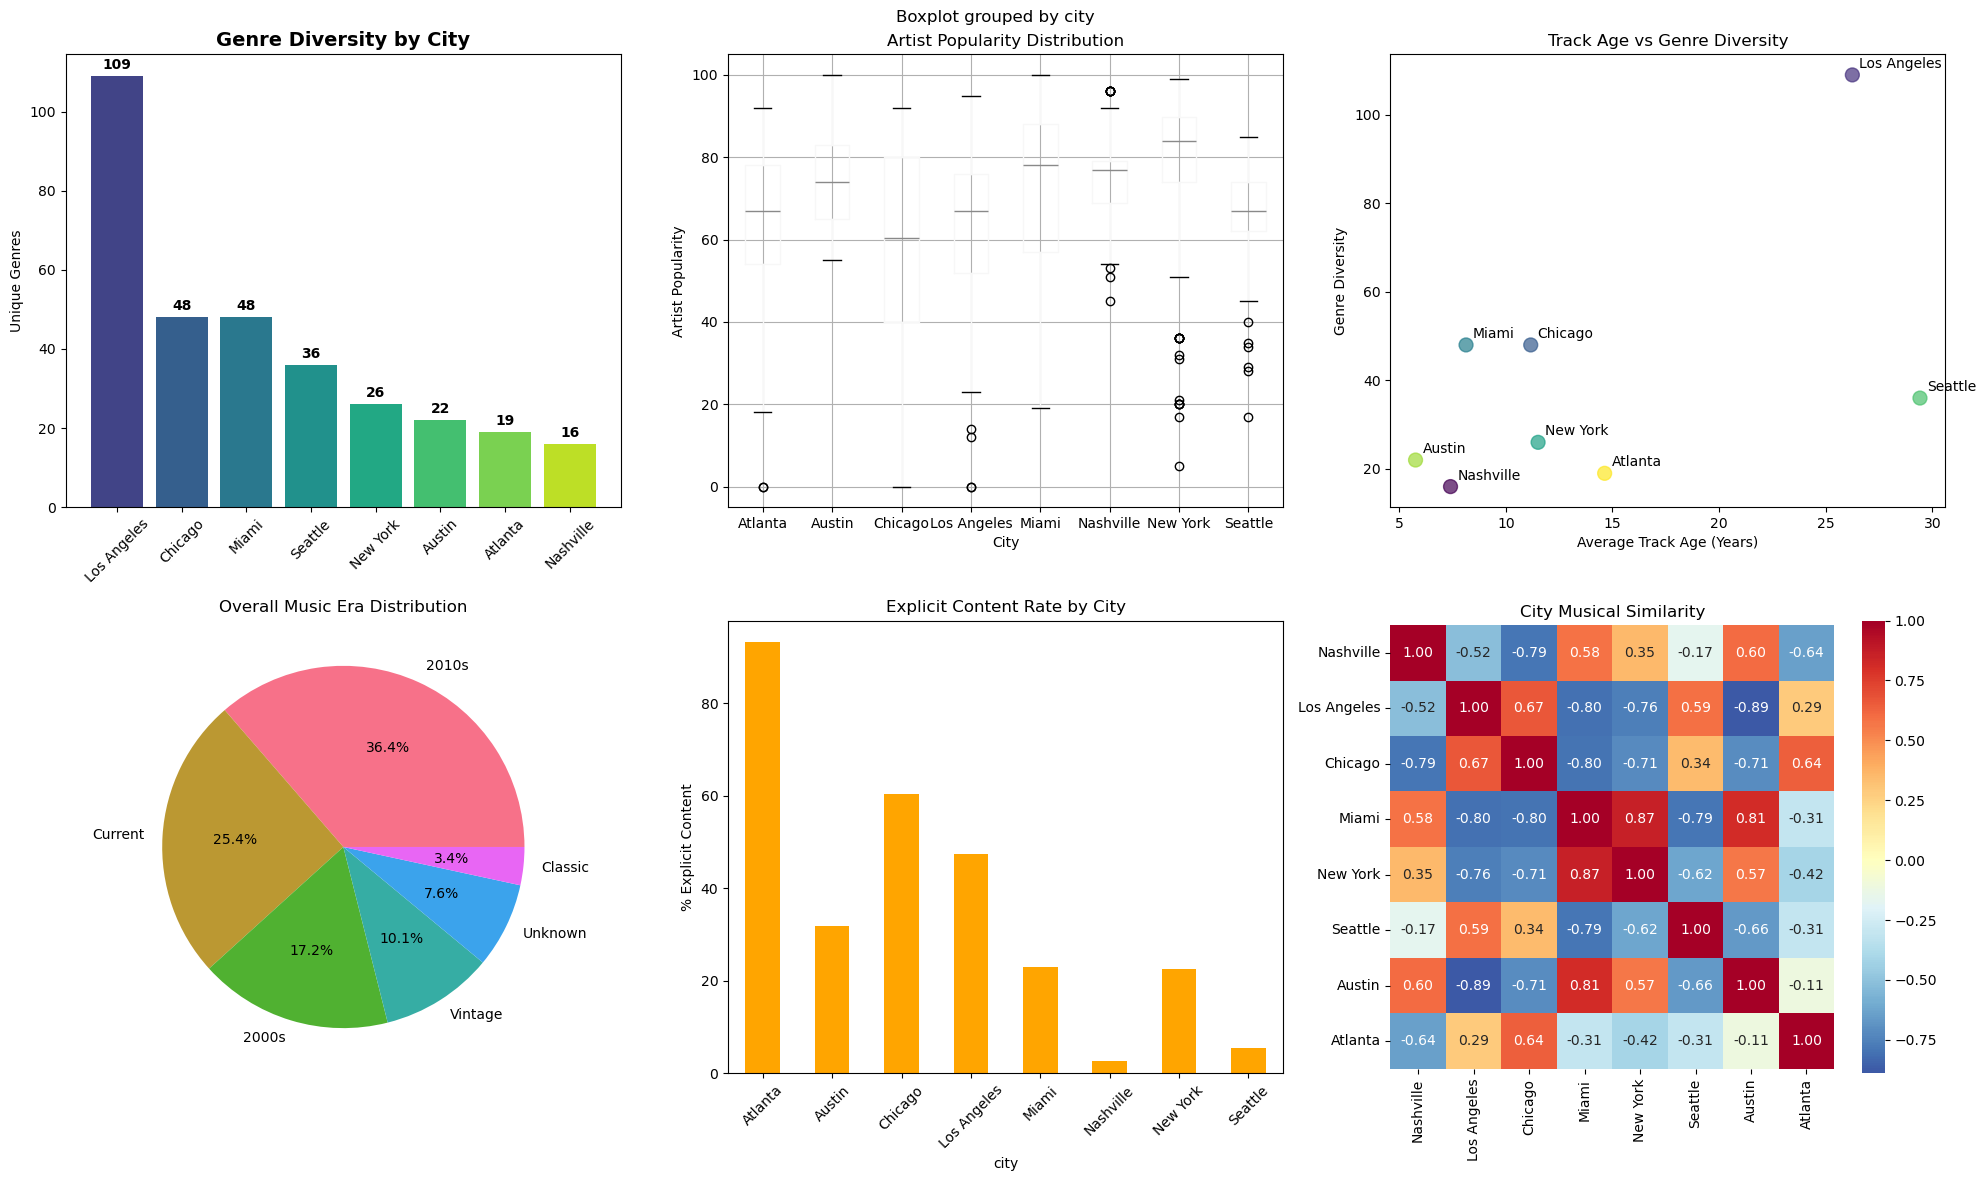


All visualizations created successfully!


In [63]:
#create static summary viz
print('\nCreating Summary Dashboard')

fig, axes = plt.subplots(2,3, figsize=(20,12))
fig.suptitle('Regional Music DNA - Comprehensive Analysis Dashboard', fontsize=20, fontweight='bold')

#1) Genre Diversity Bar Chart
cities = list(genre_stats.keys())
diversities = [genre_stats[city]['unique_genres'] for city in cities]
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(cities)))

sorted_data = sorted(zip(cities, diversities), key=lambda x: x[1], reverse=True)
cities_sorted, diversities_sorted = zip(*sorted_data)

bars = axes[0,0].bar(cities_sorted, diversities_sorted, color=colors)
axes[0,0].set_title('Genre Diversity by City', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Unique Genres')
axes[0,0].tick_params(axis='x', rotation=45)

#add value labels
for bar, value in zip(bars, diversities_sorted):
    axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height()+1,
                    str(value), ha='center', va='bottom', fontweight='bold')
    
#2) artist popularity distribution
df.boxplot(column='artist_popularity', by='city', ax=axes[0,1])
axes[0,1].set_title('Artist Popularity Distribution')
axes[0,1].set_xlabel('City')
axes[0,1].set_ylabel('Artist Popularity')

#3) track age vs genre diversity scatter
axes[0,2].scatter(metrics_df['avg_track_age'], metrics_df['genre_diversity'],
                  s=100, alpha=0.7, c=range(len(metrics_df)))

for i, city in enumerate(metrics_df.index):
    axes[0,2].annotate(city, (metrics_df.loc[city, 'avg_track_age'],
                              metrics_df.loc[city, 'genre_diversity']),
                       xytext=(5,5), textcoords='offset points')
axes[0,2].set_title('Track Age vs Genre Diversity')
axes[0,2].set_xlabel('Average Track Age (Years)')
axes[0,2].set_ylabel('Genre Diversity')

#4) music era distribution
era_counts = df['music_era'].value_counts()
axes[1,0].pie(era_counts.values, labels=era_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Overall Music Era Distribution')

#5) explicit content rate by city
explicit_rates = df.groupby('city')['explicit'].mean() * 100
explicit_rates.plot(kind='bar', ax=axes[1,1], color='orange')
axes[1,1].set_title('Explicit Content Rate by City')
axes[1,1].set_ylabel('% Explicit Content')
axes[1,1].tick_params(axis='x', rotation=45)

#6) city similarity heatmap
import seaborn as sns
sns.heatmap(similarity_df, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', ax=axes[1,2])
axes[1,2].set_title('City Musical Similarity')

plt.tight_layout()
plt.show()

print('\nAll visualizations created successfully!')

In [65]:
#generate insights summary
print('\nKEY INSIGHTS SUMMARY')
print('='*50)

insights=[]

#genre diversity insights
most_diverse = max(genre_stats.items(), key=lambda x: x[1]['unique_genres'])
least_diverse = min(genre_stats.items(), key=lambda x: x[1]['unique_genres'])
insights.append(f"{most_diverse[0]} is the most diverse ({most_diverse[1]['unique_genres']} genres)")
insights.append(f"{least_diverse[0]} is the most focused ({least_diverse[1]['unique_genres']} genres)")

#popularity insights
highest_artist_pop = metrics_df['avg_artist_popularity'].idxmax()
lowest_artist_pop = metrics_df['avg_artist_popularity'].idxmin()
insights.append(f"{highest_artist_pop} has the most popular artists")
insights.append(f"{lowest_artist_pop} features the most underground artists")

#temporal insights
newest_city = metrics_df['avg_track_age'].idxmin()
oldest_city = metrics_df['avg_track_age'].idxmax()
insights.append(f"{newest_city} has the newest music collection")
insights.append(f"{oldest_city} preserves the most classic music")

#similarity insights
max_similarity_idx = np.unravel_index(np.argmax(np.triu(similarity_matrix, k=1)), similarity_matrix.shape)
most_similar_cities = (cities[max_similarity_idx[0]], cities[max_similarity_idx[1]])
insights.append(f"{most_similar_cities[0]} and {most_similar_cities[1]} are most musically similar")

print("Visual Analysis Insights:")
for i, insight in enumerate(insights, 1):
    print(f"   {i}. {insight}")

print(f"\nReady for article writing and publication!")


KEY INSIGHTS SUMMARY
Visual Analysis Insights:
   1. Los Angeles is the most diverse (109 genres)
   2. Nashville is the most focused (16 genres)
   3. New York has the most popular artists
   4. Chicago features the most underground artists
   5. Austin has the newest music collection
   6. Seattle preserves the most classic music
   7. Miami and New York are most musically similar

Ready for article writing and publication!
